# Apresentação:

    Já falamos sobre Classificação e Regressão em outros notebooks.
    Aqui vamos falar sobre ajuste de seu modelos.

    Para o caso de Classificação, a depender do caracteristica do trabalho
    que se queira ter, do nivel de precisão que a predição deva ter. Utilizar
    a acurácia como métrica pode não ser uma boa escolha.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [60]:
df = pd.read_csv('drug200.csv');df.head()

,Age,Sex,BP,Cholesterol,Na_to_K,Drug
0,23,F,HIGH,HIGH,25.355,DrugY
1,47,M,LOW,HIGH,13.093,drugC
2,47,M,LOW,HIGH,10.114,drugC
3,28,F,NORMAL,HIGH,7.798,drugX
4,61,F,LOW,HIGH,18.043,DrugY


In [61]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 6 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Age          200 non-null    int64  
 1   Sex          200 non-null    object 
 2   BP           200 non-null    object 
 3   Cholesterol  200 non-null    object 
 4   Na_to_K      200 non-null    float64
 5   Drug         200 non-null    object 
dtypes: float64(1), int64(1), object(4)
memory usage: 9.5+ KB


# Tratamendo dos dados:

In [62]:
for var in df.columns:
  if len(df[var].unique()) < 5:
    print(f'variável {var} = {df[var].unique()}')

variável Sex = ['F' 'M']
variável BP = ['HIGH' 'LOW' 'NORMAL']
variável Cholesterol = ['HIGH' 'NORMAL']


In [40]:
df.replace('HIGH',3,inplace=True)
df.replace('NORMAL',2,inplace=True)
df.replace('LOW',1,inplace=True)

In [41]:
df['BP'].value_counts()

3    77
1    64
2    59
Name: BP, dtype: int64

In [43]:
df['Drug'].value_counts()

DrugY    91
drugX    54
drugA    23
drugC    16
drugB    16
Name: Drug, dtype: int64

In [44]:
df.replace('drugA',1,inplace=True)
df.replace('drugB',2,inplace=True)
df.replace('drugC',3,inplace=True)
df.replace('drugX',4,inplace=True)
df.replace('DrugY',5,inplace=True)


In [45]:
df['Drug'].value_counts()

5    91
4    54
1    23
3    16
2    16
Name: Drug, dtype: int64

# Machine Learning:

In [47]:
X = df.drop(["Drug","Sex"],axis=1).values
y=df.Drug.values

In [48]:
knn = KNeighborsClassifier(n_neighbors=6)

In [49]:
# Separando os dados de treino e de teste:
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=.3,
                                                    random_state=42, stratify=y)

# Treinando o modelo:
knn.fit(X_train,y_train)

# Fazendo a predição:
y_pred = knn.predict(X_test)

In [51]:
# Checando a precisão do modelo:
acuracia = round(knn.score(X_test,y_test),4)*100 # Passando para porcentagem
print(f'A precisão do modelo é de {acuracia}%')

A precisão do modelo é de 63.33%


## Matriz de Confusão:

    Para alguns casos mais complexos, o calculo de acuária anterior, pode não
    ser a melhor escolha. Não é uma questão de estar errado, porém, imagine uma
    situação de classificação de fraude bancária, uma simples divisão de
    predições corretas pelo total não é suficiente. Deste modo, precisa-se
    refinar um pouco melhor o nosso entendimento de predição correta, e dai
    nasce a necessidade de trabalhar com a Matriz de Confusão.
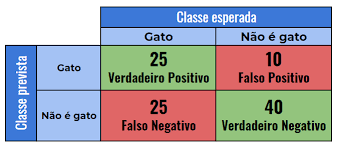

    A matriz de confusão (às vezes também chamada de 'matriz de erro' ou
    'tabela de confusão' ) é uma tabela com duas linhas e duas colunas que
    relata o número de falsos positivos , falsos negativos , verdadeiros
    positivos e verdadeiros negativos.

In [53]:
print(confusion_matrix(y_test,y_pred))

[[ 2  0  0  5  0]
 [ 0  1  0  3  1]
 [ 0  0  2  3  0]
 [ 2  2  2 10  0]
 [ 0  1  1  2 23]]


In [54]:
def calcular_matriz_confusao(previsoes, rotulos_verdadeiros):
    VP = sum((p == 1) and (r == 1) for p, r in zip(previsoes, rotulos_verdadeiros))
    VN = sum((p == 0) and (r == 0) for p, r in zip(previsoes, rotulos_verdadeiros))
    FP = sum((p == 1) and (r == 0) for p, r in zip(previsoes, rotulos_verdadeiros))
    FN = sum((p == 0) and (r == 1) for p, r in zip(previsoes, rotulos_verdadeiros))

    return VP, VN, FP, FN

In [55]:
VP, VN, FP, FN = calcular_matriz_confusao(y_pred, y_test)

print(f"Verdadeiros Positivos (VP): {VP}")
print(f"Verdadeiros Negativos (VN): {VN}")
print(f"Falsos Positivos (FP): {FP}")
print(f"Falsos Negativos (FN): {FN}")

Verdadeiros Positivos (VP): 2
Verdadeiros Negativos (VN): 0
Falsos Positivos (FP): 0
Falsos Negativos (FN): 0


In [56]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           1       0.50      0.29      0.36         7
           2       0.25      0.20      0.22         5
           3       0.40      0.40      0.40         5
           4       0.43      0.62      0.51        16
           5       0.96      0.85      0.90        27

    accuracy                           0.63        60
   macro avg       0.51      0.47      0.48        60
weighted avg       0.66      0.63      0.64        60



## Acurácia ponderada:

    Deste modo, aqui calcularemos o que definirei aqui como "Acurácia Ponderada",
    só para diferenciar o calculo de acurácia anterior. Onde agora, vamos
    retirar a nossa acurácia de uma Matriz de Confusão.
    
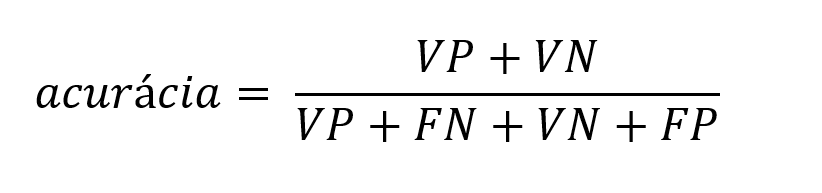

## Precisão:

    Precisão, também chamada de valor preditivo positivo, é outra métrica de
    mensuração da qualidade do modelo que também é construida através da matriz
    de confusão, porém olhando apenas para os valores positivos da predição.
    No nosso caso, este é o número de transações fraudulentas corretamente
    rotuladas dividido pelo número total de transações classificadas como
    fraudulentas. Alta precisão significa ter uma taxa de falsos positivos
    mais baixa. Para o nosso classificador, isso se traduz em menos transações
    ![639c3d2a22f93657640ef19f_f1-score-eqn.webp](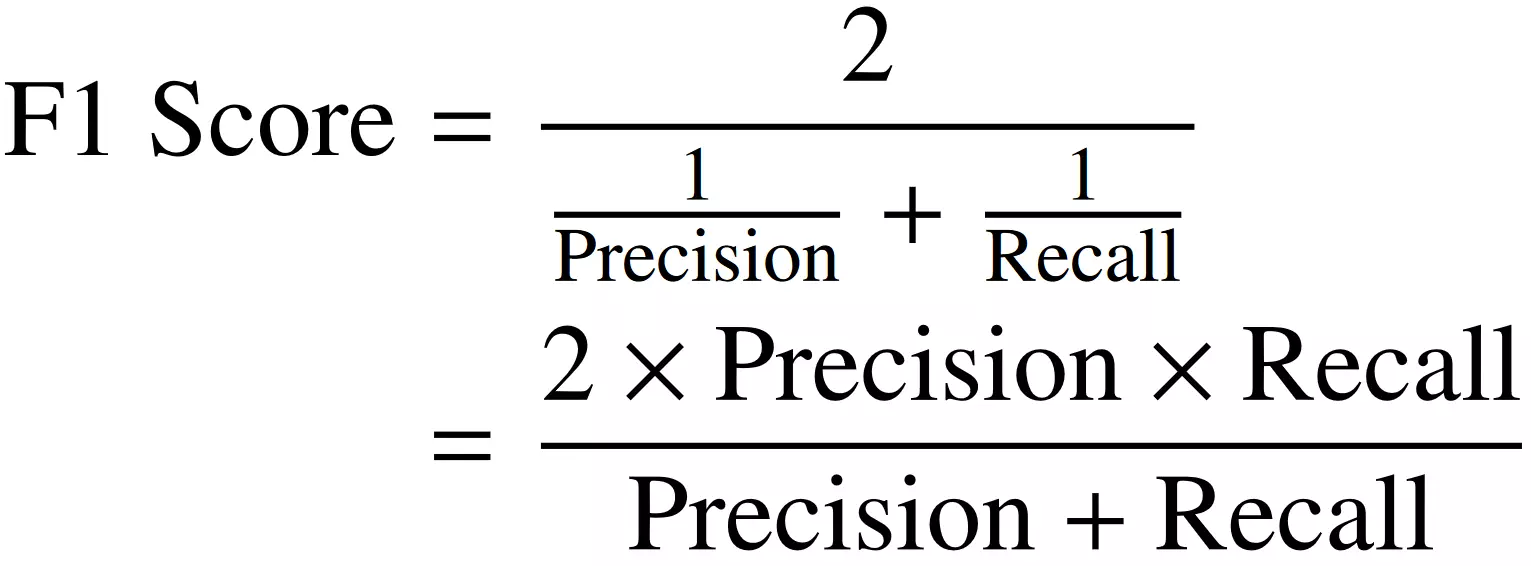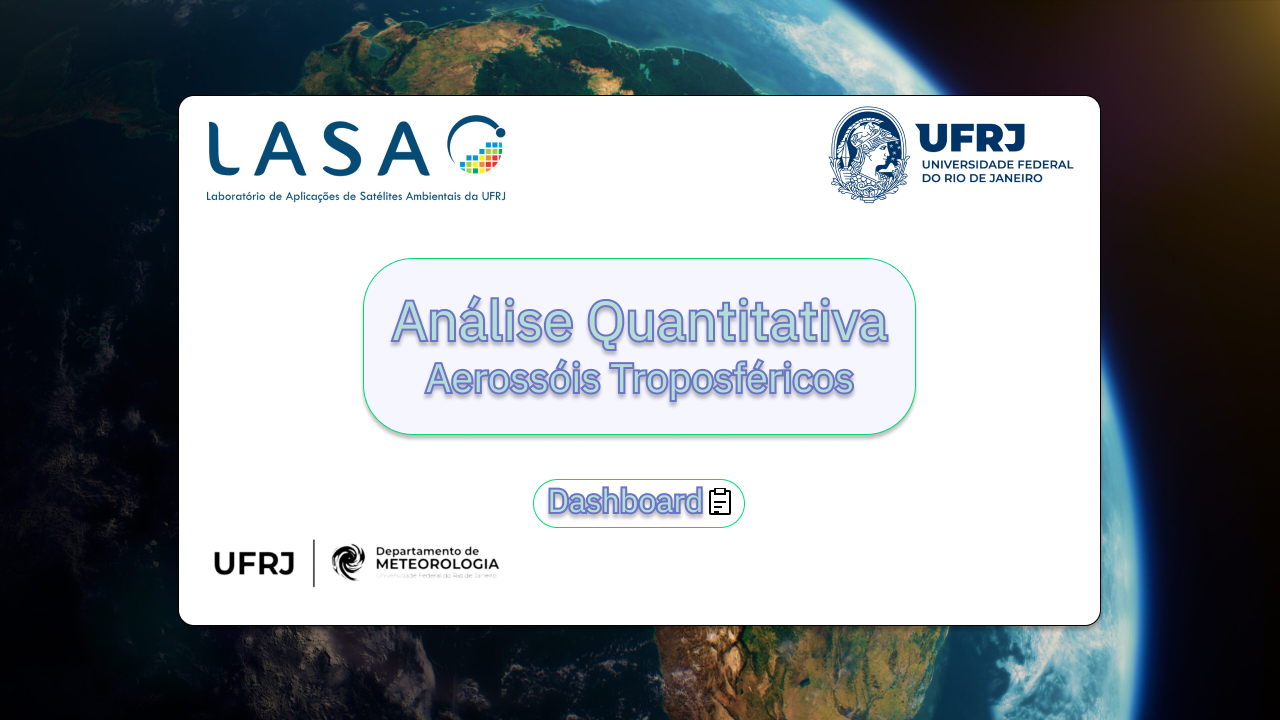)legítimas classificadas como fraudulentas.

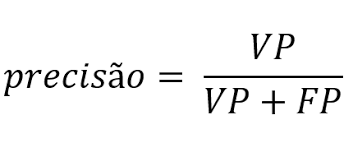

## Recall:

    Recall, também chamado de sensibilidade, é uma métrica parecida com a
    precisão, porém não leva em consideração somente os positivos, mas também
    as predições negativas. A recuperação alta reflete uma taxa mais baixa de
    falsos negativos. Para nosso classificador, significa prever corretamente a
    maioria das transações fraudulentas, o que em alguns casos pode ser bem útil.

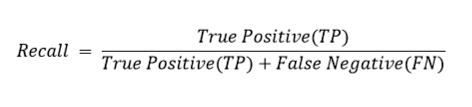

## F1 Score:

    O F1 Score é a média harmônica de precisão e recuperação. Esta métrica
    dá peso igual à precisão e ao recall, portanto leva em consideração tanto o
    número de erros cometidos pelo modelo quanto o tipo de erros. O F1 Score
    favorece modelos com precisão e recall semelhantes e é uma métrica útil
    se estivermos buscando um modelo com desempenho razoavelmente bom em ambas
    as métricas.

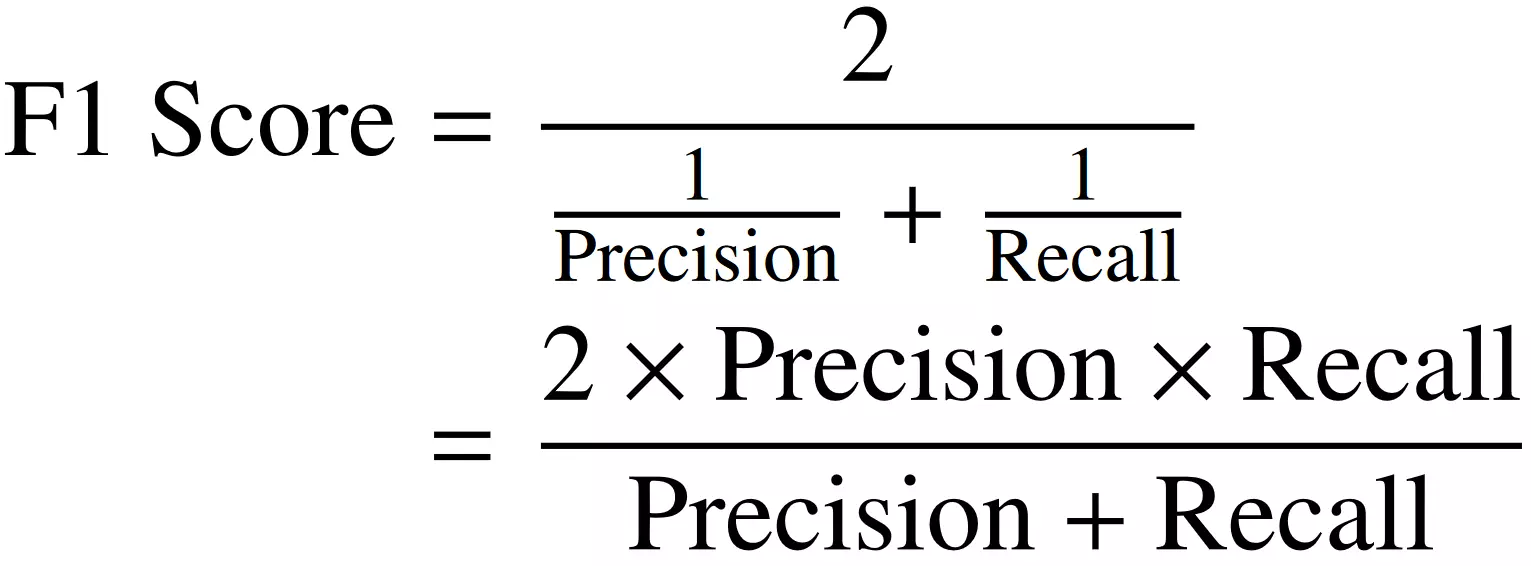